<a href="https://colab.research.google.com/github/gokuljagannadh/Airbnb_Booking_Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone Project 1/Airbnb NYC 2019.csv'
df = pd.read_csv(file_path)

In [4]:
df.info()
#checking the basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
#checking the columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
#obtaining the first 4 rows
df.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


Let's have a look at the first three columns,host_id,id and host_name

In [7]:
x=df['host_id'].nunique()
y=df['host_name'].nunique()
z=df['name'].nunique()
f'The total number of unique values of host_id  is {x}, host_name is {y} and name is  {z}'

'The total number of unique values of host_id  is 37457, host_name is 11452 and name is  47905'

In [8]:
pd.DataFrame(df['host_id'].value_counts()).reset_index().rename(columns={'index':'host_id','host_id':'Value counts'})[:3]

,host_id,Value counts
0,219517861,327
1,107434423,232
2,30283594,121


In [9]:
df[df['host_id']==219517861]['host_name'][:2]

38293    Sonder (NYC)
38294    Sonder (NYC)
Name: host_name, dtype: object

In [10]:
pd.DataFrame(df['host_name'].value_counts()).reset_index().rename(columns={'index':'host_name','host_name':'Value counts'})[:3]

,host_name,Value counts
0,Michael,417
1,David,403
2,Sonder (NYC),327


In [11]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
pd.DataFrame(df['name'].value_counts()).reset_index().rename(columns={'index':'Property name','name':'Value counts'})[:3]

,Property name,Value counts
0,Hillside Hotel,18
1,Home away from home,17
2,New york Multi-unit building,16


In [13]:
df[df['name']=='Hillside Hotel'][:3]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90
24607,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,2017-10-08,0.05,18,180
26734,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,NaN,NaN,18,365


From the above results, it is clear that only the id value is unique and all other variables such as host name, host id and name are catagorical variables. Also it is observed that a particular host has multiple host ids for different properties.Also the name for each property owned by the same host is different. There were also some properties which had same host name and property name,Hillside hotel in Queens is an example. The host id with host name Sonder(NYC) has the highest listings

In [14]:
pd.DataFrame(df[df['name']==df['host_name']]['name'].value_counts()).reset_index().rename(columns={'index':'Name','name':'Value counts'})[:3]


,Name,Value counts
0,Hillside Hotel,18
1,Olivier,1
2,Monty,1


In [15]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

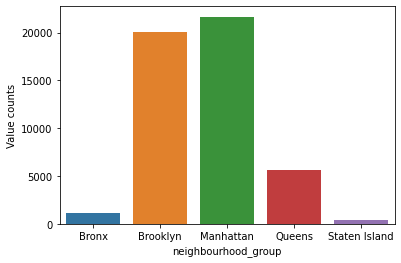

In [16]:
df_group = pd.DataFrame(df.groupby('neighbourhood_group')['id'].count()).reset_index().rename(columns={'index':'Neighbourhood_group','id':'Value counts'})[:5]
sns.barplot(x='neighbourhood_group',y='Value counts',data = df_group)

The above plot shows the number of id counts in each neighbourhood group. manhattan and Brooklyn have the highest nummber of ids

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

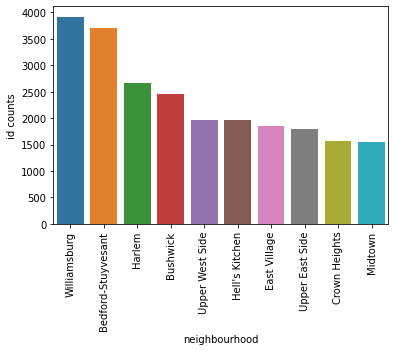

In [18]:
df1 = df.groupby('neighbourhood')['id'].count().sort_values(ascending=False)[:10]
df_neighbourhood = df1.reset_index().rename(columns={'index':'neighbourhood','id':'id counts'})
sns.barplot(x='neighbourhood',y='id counts',data = df_neighbourhood)
plt.xticks(rotation=90)


We plotted property listings in top 10 neighbourhoods

In [31]:
df_2 = pd.DataFrame(df.groupby('neighbourhood_group')['neighbourhood'].value_counts(ascending=False)).rename(columns={'neighbourhood':'count'})

In [51]:
df_2.head().reset_index()

,neighbourhood_group,neighbourhood,count
0,Bronx,Kingsbridge,70
1,Bronx,Fordham,63
2,Bronx,Longwood,62
3,Bronx,Mott Haven,60
4,Bronx,Concourse,50


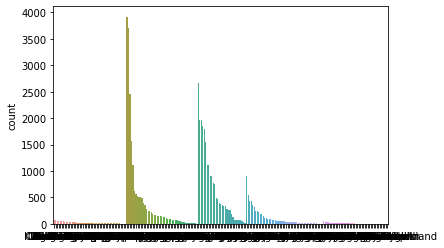

In [52]:
df_3 = df_2.reset_index()
ax = sns.barplot(x='neighbourhood',y='count',data = df_3)
ax.set(xlabel=None)

kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
mode_idx = np.argmax(ys)
ax.vlines(xs[mode_idx], 0, ys[mode_idx], color='tomato', ls='--', lw=2)
plt.show()

this plot shows the id counts in each neighbourhood, which are arranged in a descending order groupwise

In [ ]:
df.groupby(['neighbourhood_group','neighbourhood'])['host_name'].value_counts().sort_values(ascending=False).head(10).loc['Manhattan']

neighbourhood       host_name   
Financial District  Sonder (NYC)    218
Hell's Kitchen      John             55
Financial District  Sonder           51
Murray Hill         Sonder (NYC)     50
                    Stanley          50
Midtown             Red Awning       49
Hell's Kitchen      Kara             41
Name: host_name, dtype: int64

now counting the host name in each neighbourhood group and arranged in descending order

In [ ]:
df.groupby('neighbourhood_group')['host_name'].value_counts().sort_values(ascending=False)

neighbourhood_group  host_name   
Manhattan            Sonder (NYC)    327
                     Blueground      230
                     Michael         212
                     David           202
Brooklyn             Michael         159
                                    ... 
                     Callie            1
                     Calisa            1
                     Calia             1
                     Cal               1
Staten Island        Yuriy             1
Name: host_name, Length: 15343, dtype: int64

Here Sonder NYC was found as the host name , who had the highest number of listings

In [ ]:
df['price'].sort_values(ascending=False)

9151     10000
17692    10000
29238    10000
40433     9999
12342     9999
         ...  
25778        0
25796        0
25433        0
26841        0
25795        0
Name: price, Length: 48895, dtype: int64

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
sns.barplot(x='neighbourhood',y='id counts',data = df_neighbourhood)


(array([4.8597e+04, 1.8800e+02, 5.7000e+01, 1.8000e+01, 9.0000e+00,
        8.0000e+00, 7.0000e+00, 3.0000e+00, 2.0000e+00, 6.0000e+00]),
 array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000., 10000.]),
 <a list of 10 Patch objects>)

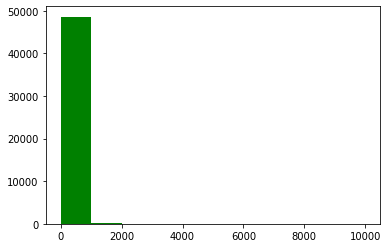

In [ ]:
plt.hist(price.values,color='green')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


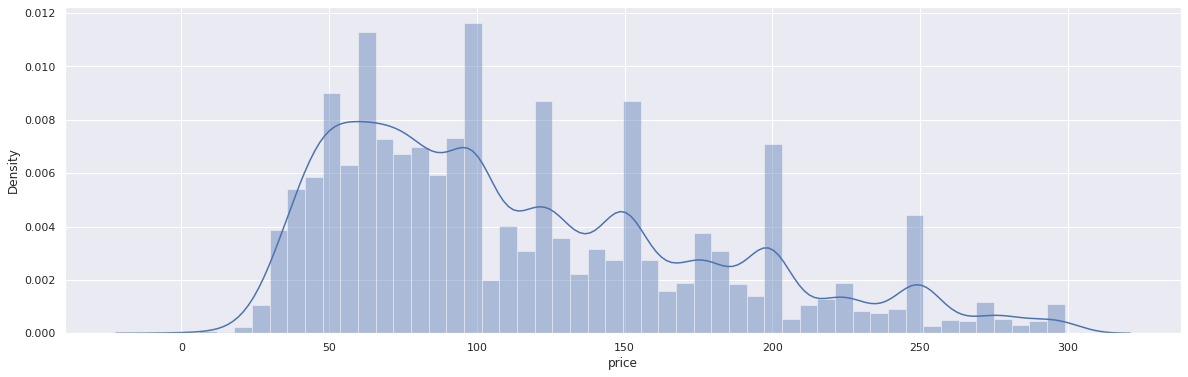

In [18]:
sns.set(rc={"figure.figsize": (20, 6)})
df_4 =df[df['price']<300]['price']
sns.distplot(df_4,hist=True)

In [12]:
df['price'].mean()


152.7206871868289

In [17]:
df[df['price']>300]['id'].count()


3357

In [14]:
df.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


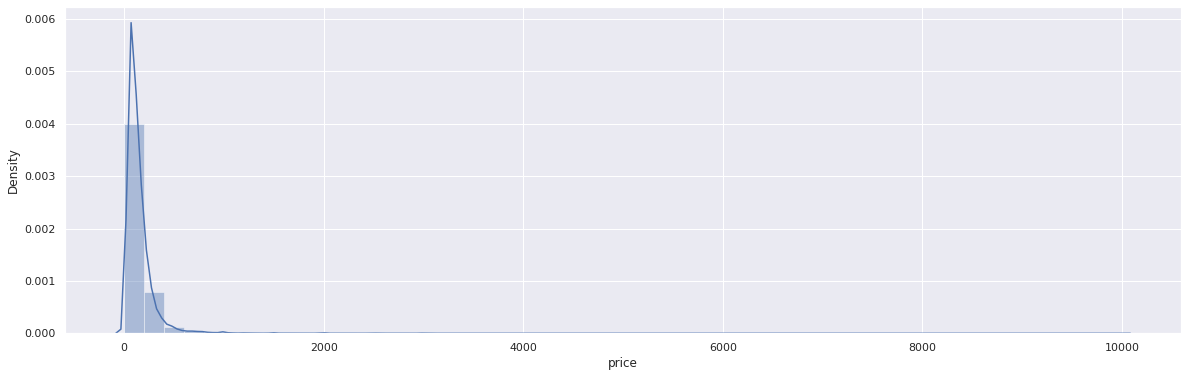

In [ ]:
sns.distplot(df['price'],hist = True)

The price distribution plot for the entire data gives a postiveley skewed data around a mean value 152. there are only a few listings(aproximately 7%) whose price is above 300. 

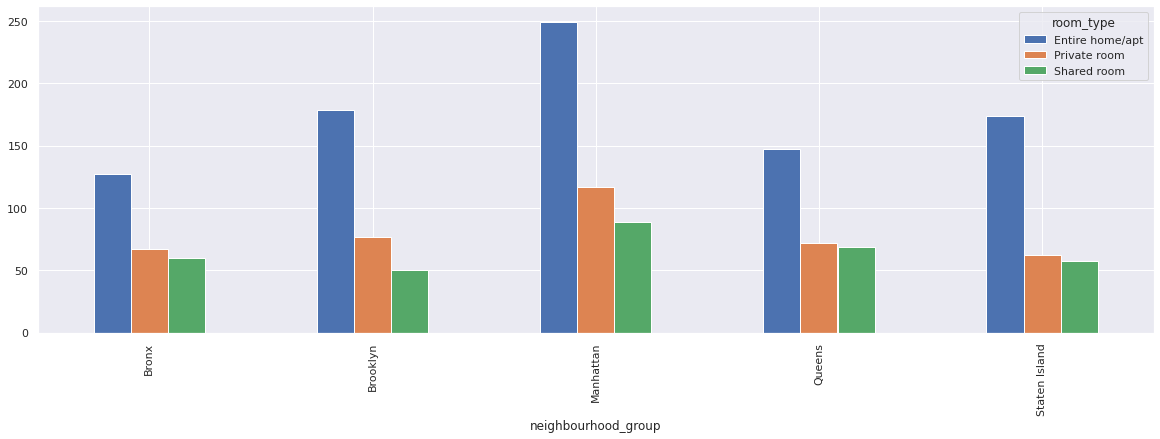

In [ ]:

df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack().plot(kind='bar')

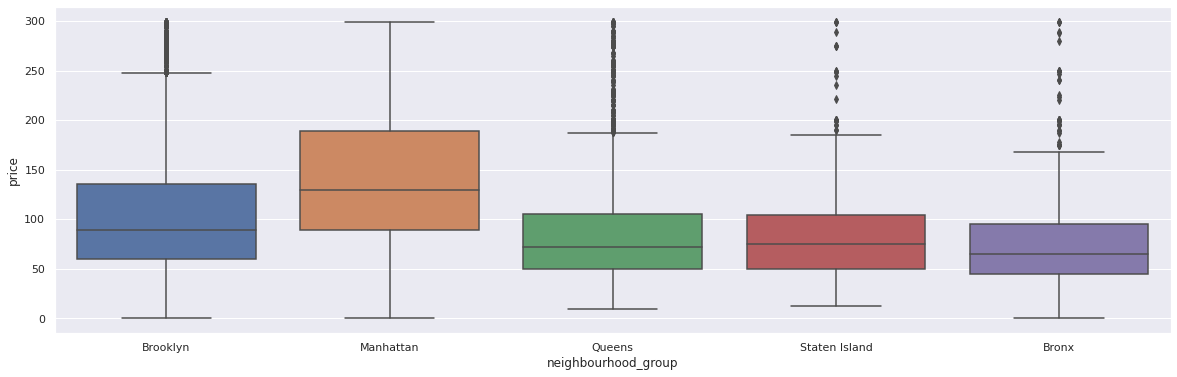

In [21]:
sns.boxplot(x="neighbourhood_group", y="price", data=df[df['price']<300]);


The distribution of price based on the type of room in each neighbourhood group is shown, which depicts that Manhattan has the highest mean in price in all the types among different neigbourhood groups. Also from the box plot, Manhattan has the highest mean price in overall types

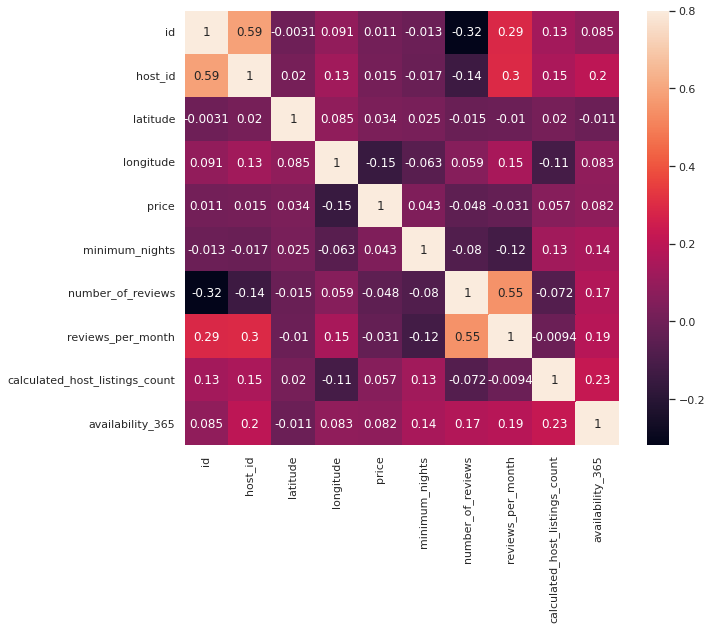

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, annot = True, square=True);

From the correlation plot, There is positive corrrelation among

*   availability 365,calculated host listings counts 

*   availability and reviews per month
*   longitude and reviews per month

My Analysis on correlation

As calculated host listings count increases, the number of rooms available would also increase which accounts for the postive correlation among the availability 365 and calculated host listings counts.

Also if the availability is higher more people will choose that host and give reviews which accounts for the positive correlation between availability and reviews per month.

As we go to right of the map, the longitude value increases and the id counts also increases which in turn accounts for the increased number of reviews per month.


In [ ]:
df.groupby('host_name')['reviews_per_month'].max().sort_values(ascending=False)

host_name
Row NYC     58.50
Louann      20.94
Nalicia     19.75
Danielle    16.22
Brent       15.78
            ...  
韦达            NaN
馨惠            NaN
단비            NaN
진             NaN
현선            NaN
Name: reviews_per_month, Length: 11452, dtype: float64

In [20]:
df.loc[df['host_name']=='Row NYC']['neighbourhood_group'][:2]

42074    Manhattan
42075    Manhattan
Name: neighbourhood_group, dtype: object

Also it is noted dat the host_name Row NYC had the highest number of reviews per month whose properties are located in the Neighbourhood group Manhattan

Text(0.5, 1.0, 'Location Co-ordinates')

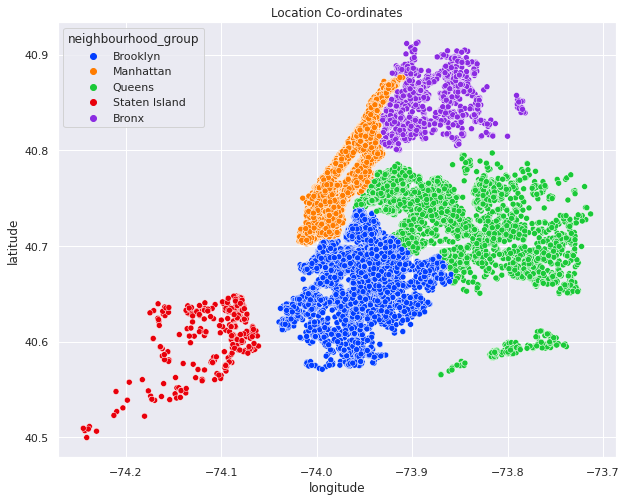

In [ ]:
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=df, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates')

The borough wise distribution of listings are shown

Text(0.5, 1.0, 'Distribution of type of rooms across NYC')

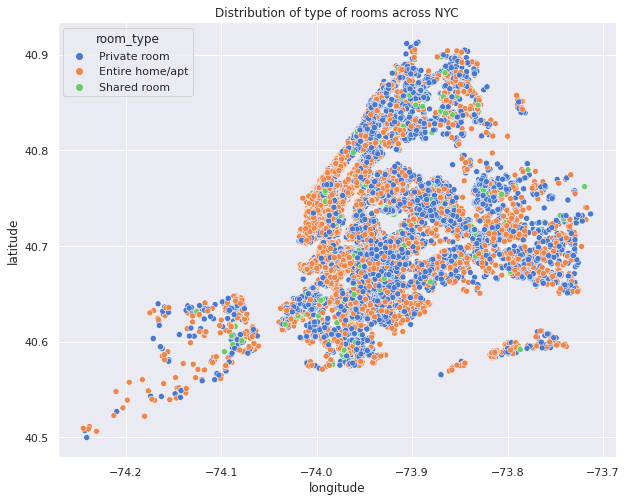

In [ ]:
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(x=df.longitude, y=df.latitude,hue=df.room_type,palette='muted')
ax.set_title('Distribution of type of rooms across NYC')


The above plot depicts the distribution of types of room in the entire NYC

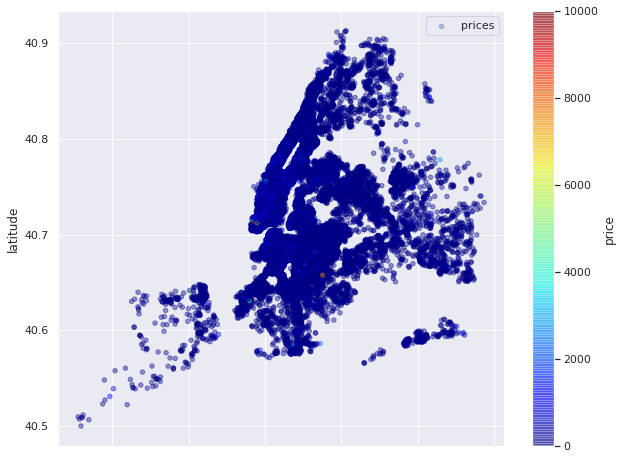

In [25]:
price_dist=df.plot(kind='scatter', x='longitude', y='latitude', label='prices', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
price_dist.legend()

The price distribution acrosss the entire NYC is shown. The outliers can also be spotted. Also lets try to insert the above plot in the NYC map.



In [ ]:
from skimage.io import imread


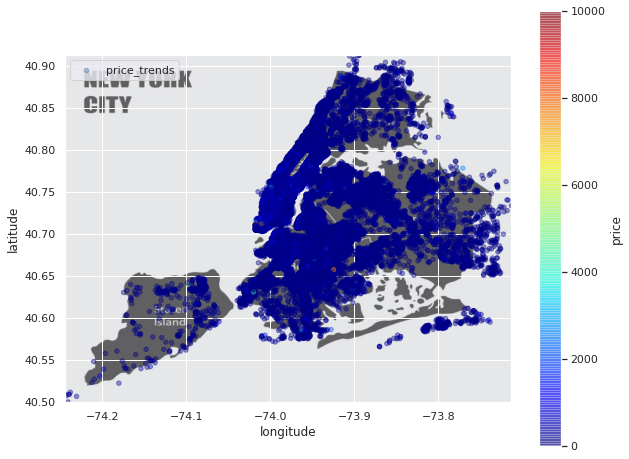

In [ ]:

plt.figure(figsize=(10,7))
img=imread('/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone Project 1/istockphoto-1166829871-612x612.jpg')

plt.imshow(img,zorder=0,extent=[df['longitude'].min(),df['longitude'].max(),df['latitude'].min(),df['latitude'].max()])
ax = plt.gca()
df.plot(kind='scatter', x='longitude', y='latitude', label='price_trends', c='price',ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

In [31]:
#lets calculate the sum of total availability for each host ids.calculated host listings count is also included in the dataframe
df_avg_availability =pd.DataFrame(df.groupby(['host_id','neighbourhood_group','calculated_host_listings_count'])['availability_365'].sum())
df5=df_avg_availability.rename(columns={'availability_365':'sum_availability'})
df_avg_availability_ = df5.reset_index()

In [32]:
df_avg_availability_.head()

,host_id,neighbourhood_group,calculated_host_listings_count,sum_availability
0,2438,Brooklyn,1,0
1,2571,Brooklyn,1,23
2,2787,Brooklyn,6,1412
3,2845,Manhattan,2,720
4,2868,Brooklyn,1,221


In [33]:
#lets check if there is any null values in the calculated host listings count
df_avg_availability_['calculated_host_listings_count'].isnull().sum()

0

In [34]:
#defining a function to calculate the average availability for each host ids. Average availability is defined as the
# total availabiities for a particular host id divided by the calculated host listing counts
def avg_availability(sum,list_count):
  return sum/list_count

In [35]:
df_avg_availability_['avg_availability']=df_avg_availability_.apply(lambda x :avg_availability(x['sum_availability'],x['calculated_host_listings_count']),axis=1)

In [42]:
#lets sort the calculated host listings count in descending order and avg availability in ascending order
df_avg_availability_.sort_values(['calculated_host_listings_count','avg_availability'],ascending=[False,True])

,host_id,neighbourhood_group,calculated_host_listings_count,sum_availability,avg_availability
34757,219517861,Manhattan,327,98588,301.492355
29494,107434423,Brooklyn,232,537,2.314655
29495,107434423,Manhattan,232,58347,251.495690
19636,30283594,Manhattan,121,37924,313.421488
31172,137358866,Brooklyn,103,1384,13.436893
...,...,...,...,...,...
37428,271336460,Brooklyn,1,365,365.000000
37491,272609175,Brooklyn,1,365,365.000000
37504,272870209,Manhattan,1,365,365.000000
37509,273038911,Manhattan,1,365,365.000000


In [38]:
df[df['host_id']==219517861]['host_name'][:1]

38293    Sonder (NYC)
Name: host_name, dtype: object

In [ ]:
df[df['host_name']=='Sonder (NYC)']['neighbourhood_group'].value_counts()

Manhattan    327
Name: neighbourhood_group, dtype: int64

Here the idea was to calculate the average availability for a particular host id Since different hosts has multiple listings. 

**Assumption**\
The one with large number of host listing counts and less number of availability would be the busiest host.

**Our** **Findings**\
 From our data we deducted the host id(219517861) who has the highest number of host listings count with less avg availability.The host name corresponding to the host id is Sonder NYC(Manhattan) only 